# Import packeges:

In [10]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import pickle
import codecs
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Load dataset:

In [27]:
df_data_1 = pd.read_csv("../common/dataset.csv")
df_data_1

,CUST_COD,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN
0,53613503,1490.680,M,university,single,NaN,0,0,0,0,...,629.156401,599.283174,608.257067,89.440800,149.068000,68.571280,0.000000,29.813600,59.627200,0
1,35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,...,533.872135,-2.772665,-14.399969,149.068000,159.830710,29.813600,0.000000,0.000000,0.000000,1
2,58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,...,-19.349026,-19.349026,-19.349026,59.627200,532.590150,16.963938,0.000000,0.000000,29.813600,0
3,26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,...,88.546392,70.330282,253.177091,80.556347,217.221890,88.784901,70.628418,298.463950,216.416922,0
4,41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,...,0.000000,569.439760,0.000000,119.254400,29.813600,0.000000,569.439760,0.000000,0.000000,1
5,46414261,2385.088,M,university,single,27/01/1989,2,0,0,0,...,1670.515635,1706.768973,1744.542804,107.716537,92.422160,59.627200,62.608560,65.589920,60.849558,1
6,10438751,596.272,M,university,married,08/01/1985,1,2,0,0,...,591.978842,570.840999,607.273218,0.000000,38.847121,20.571384,25.371374,50.683120,0.000000,1
7,19267237,10732.896,F,university,single,16/01/1983,-1,-1,-1,-1,...,146.444403,34.285640,0.000000,293.962096,254.518703,146.444403,0.000000,0.000000,277.087598,0
8,39470148,1490.680,M,university,single,07/01/1992,2,0,0,0,...,582.080726,1051.466045,479.969146,89.440800,38.757680,19.140331,18.245923,35.537811,17.888160,1
9,24381216,1490.680,F,university,married,19/01/1992,0,0,0,0,...,741.762368,778.075333,801.568450,59.627200,104.496668,59.627200,238.508800,119.254400,108.819640,1


In [28]:
df_data_1.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT PAYMENT JAN']).count()

CUST_COD  LIMIT_BAL  \
SEX EDUCATION       MARRIAGE DEFAULT PAYMENT JAN                        
F   graduate school married  0                        1461       1461   
                             1                         342        342   
                    other    0                          12         12   
                             1                           2          2   
                    single   0                        3042       3042   
                             1                         672        672   
    high school     married  0                        1206       1206   
                             1                         398        398   
                    other    0                          49         49   
                             1                          15         15   
                    single   0                         687        687   
                             1                         205        205   
    other           married  0                          30         30   
                             1                           1          1   
                    other    0                           2          2   
                    single   0                          41         41   
                             1                           2          2   
    university      married  0                        3063       3063   
                             1                         909        909   
                    other    0                          65         65   
                             1                          22         22   
                    single   0                        2826       2826   
                             1                         786        786   
M   graduate school married  0                        1160       1160   
                             1                         345        345   
                    other    0                          16         16   
                             1                           9          9   
                    single   0                        1913       1913   
                             1                         441        441   
    high school     married  0                         654        654   
                             1                         267        267   
                    other    0                          23         23   
                             1                          11         11   
                    single   0                         607        607   
                             1                         198        198   
    other           married  0                          13         13   
                             1                           2          2   
                    single   0                          17         17   
                             1                           2          2   
    university      married  0                        1525       1525   
                             1                         568        568   
                    other    0                          40         40   
                             1                          19         19   
                    single   0                        1951       1951   
                             1                         647        647   

                                                  BIRTH_DATE  PAY_DEC  \
SEX EDUCATION       MARRIAGE DEFAULT PAYMENT JAN                        
F   graduate school married  0                          1414     1461   
                             1                           336      342   
                    other    0                            12       12   
                             1                             2        2   
                    single   0                          2955     3042   
                             1                           648      672   
    high school     married  0    

In [29]:
df_target = df_data_1[['DEFAULT PAYMENT JAN','CUST_COD']]

In [30]:
df_target.head()

,DEFAULT PAYMENT JAN,CUST_COD
0,0,53613503
1,1,35524089
2,0,58777007
3,0,26913418
4,1,41993633


In [31]:
# Add material ID as index of the DataFrame
df_data_1 = df_data_1.set_index(['CUST_COD'], drop=True)
df_data_1 = df_data_1.drop("DEFAULT PAYMENT JAN",1)
df_data_1.index.name = None
print(df_data_1.shape)
df_data_1.head()

(26884, 23)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,581.961472,629.156401,599.283174,608.257067,89.440800,149.06800,68.571280,0.000000,29.81360,59.627200
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,3137.285128,533.872135,-2.772665,-14.399969,149.068000,159.83071,29.813600,0.000000,0.00000,0.000000
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,10.852150,-19.349026,-19.349026,-19.349026,59.627200,532.59015,16.963938,0.000000,0.00000,29.813600
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,216.744872,88.546392,70.330282,253.177091,80.556347,217.22189,88.784901,70.628418,298.46395,216.416922
41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,-1,...,29.813600,0.000000,569.439760,0.000000,119.254400,29.81360,0.000000,569.439760,0.00000,0.000000


In [32]:
df_target.head()

,DEFAULT PAYMENT JAN,CUST_COD
0,0,53613503
1,1,35524089
2,0,58777007
3,0,26913418
4,1,41993633


In [33]:
df_data_1.describe()

,LIMIT_BAL,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,PAY_JUL,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL
count,26884.00000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,4997.91411,-0.016367,-0.133313,-0.166344,-0.219052,-0.264879,-0.291884,1530.136656,1467.012379,1404.166272,1292.346498,1203.977907,1159.529034,168.639427,178.825861,156.416357,144.518815,144.259750,157.534344
std,3879.73624,1.123991,1.197715,1.197837,1.171221,1.135089,1.150547,2206.111841,2129.923058,2072.220534,1923.241494,1816.137779,1775.876050,495.392694,688.001298,531.588567,465.903631,463.780141,538.637089
min,298.13600,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-4936.535888,-2080.303567,-4688.605990,-2424.859342,-2424.859342,-10124.788000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1490.68000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,105.115300,87.622170,79.535231,68.951403,52.553923,37.594950,29.634718,24.879449,11.627304,8.884453,7.870790,3.637259
50%,4173.90400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,667.198554,631.705464,599.491869,568.008707,539.998830,506.920641,62.608560,60.044590,54.260752,44.720400,44.720400,44.720400
75%,7155.26400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.891324,1905.320095,1798.386166,1629.998953,1504.528417,1473.179417,149.276695,149.068000,134.369895,119.709057,120.379863,119.321481
max,29813.60000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28755.545150,29334.525260,49612.483810,26581.388370,27642.305330,28670.665830,26043.729910,50213.824120,26714.178140,18514.245600,12716.364990,15761.436660


In [34]:
df_target.describe()

,DEFAULT PAYMENT JAN,CUST_COD
count,26884.000000,2.688400e+04
mean,0.221098,3.506806e+07
std,0.414994,1.423976e+07
min,0.000000,1.015513e+07
25%,0.000000,2.275616e+07
50%,0.000000,3.519585e+07
75%,0.000000,4.727209e+07
max,1.000000,5.963161e+07


# Plot visual correlations:

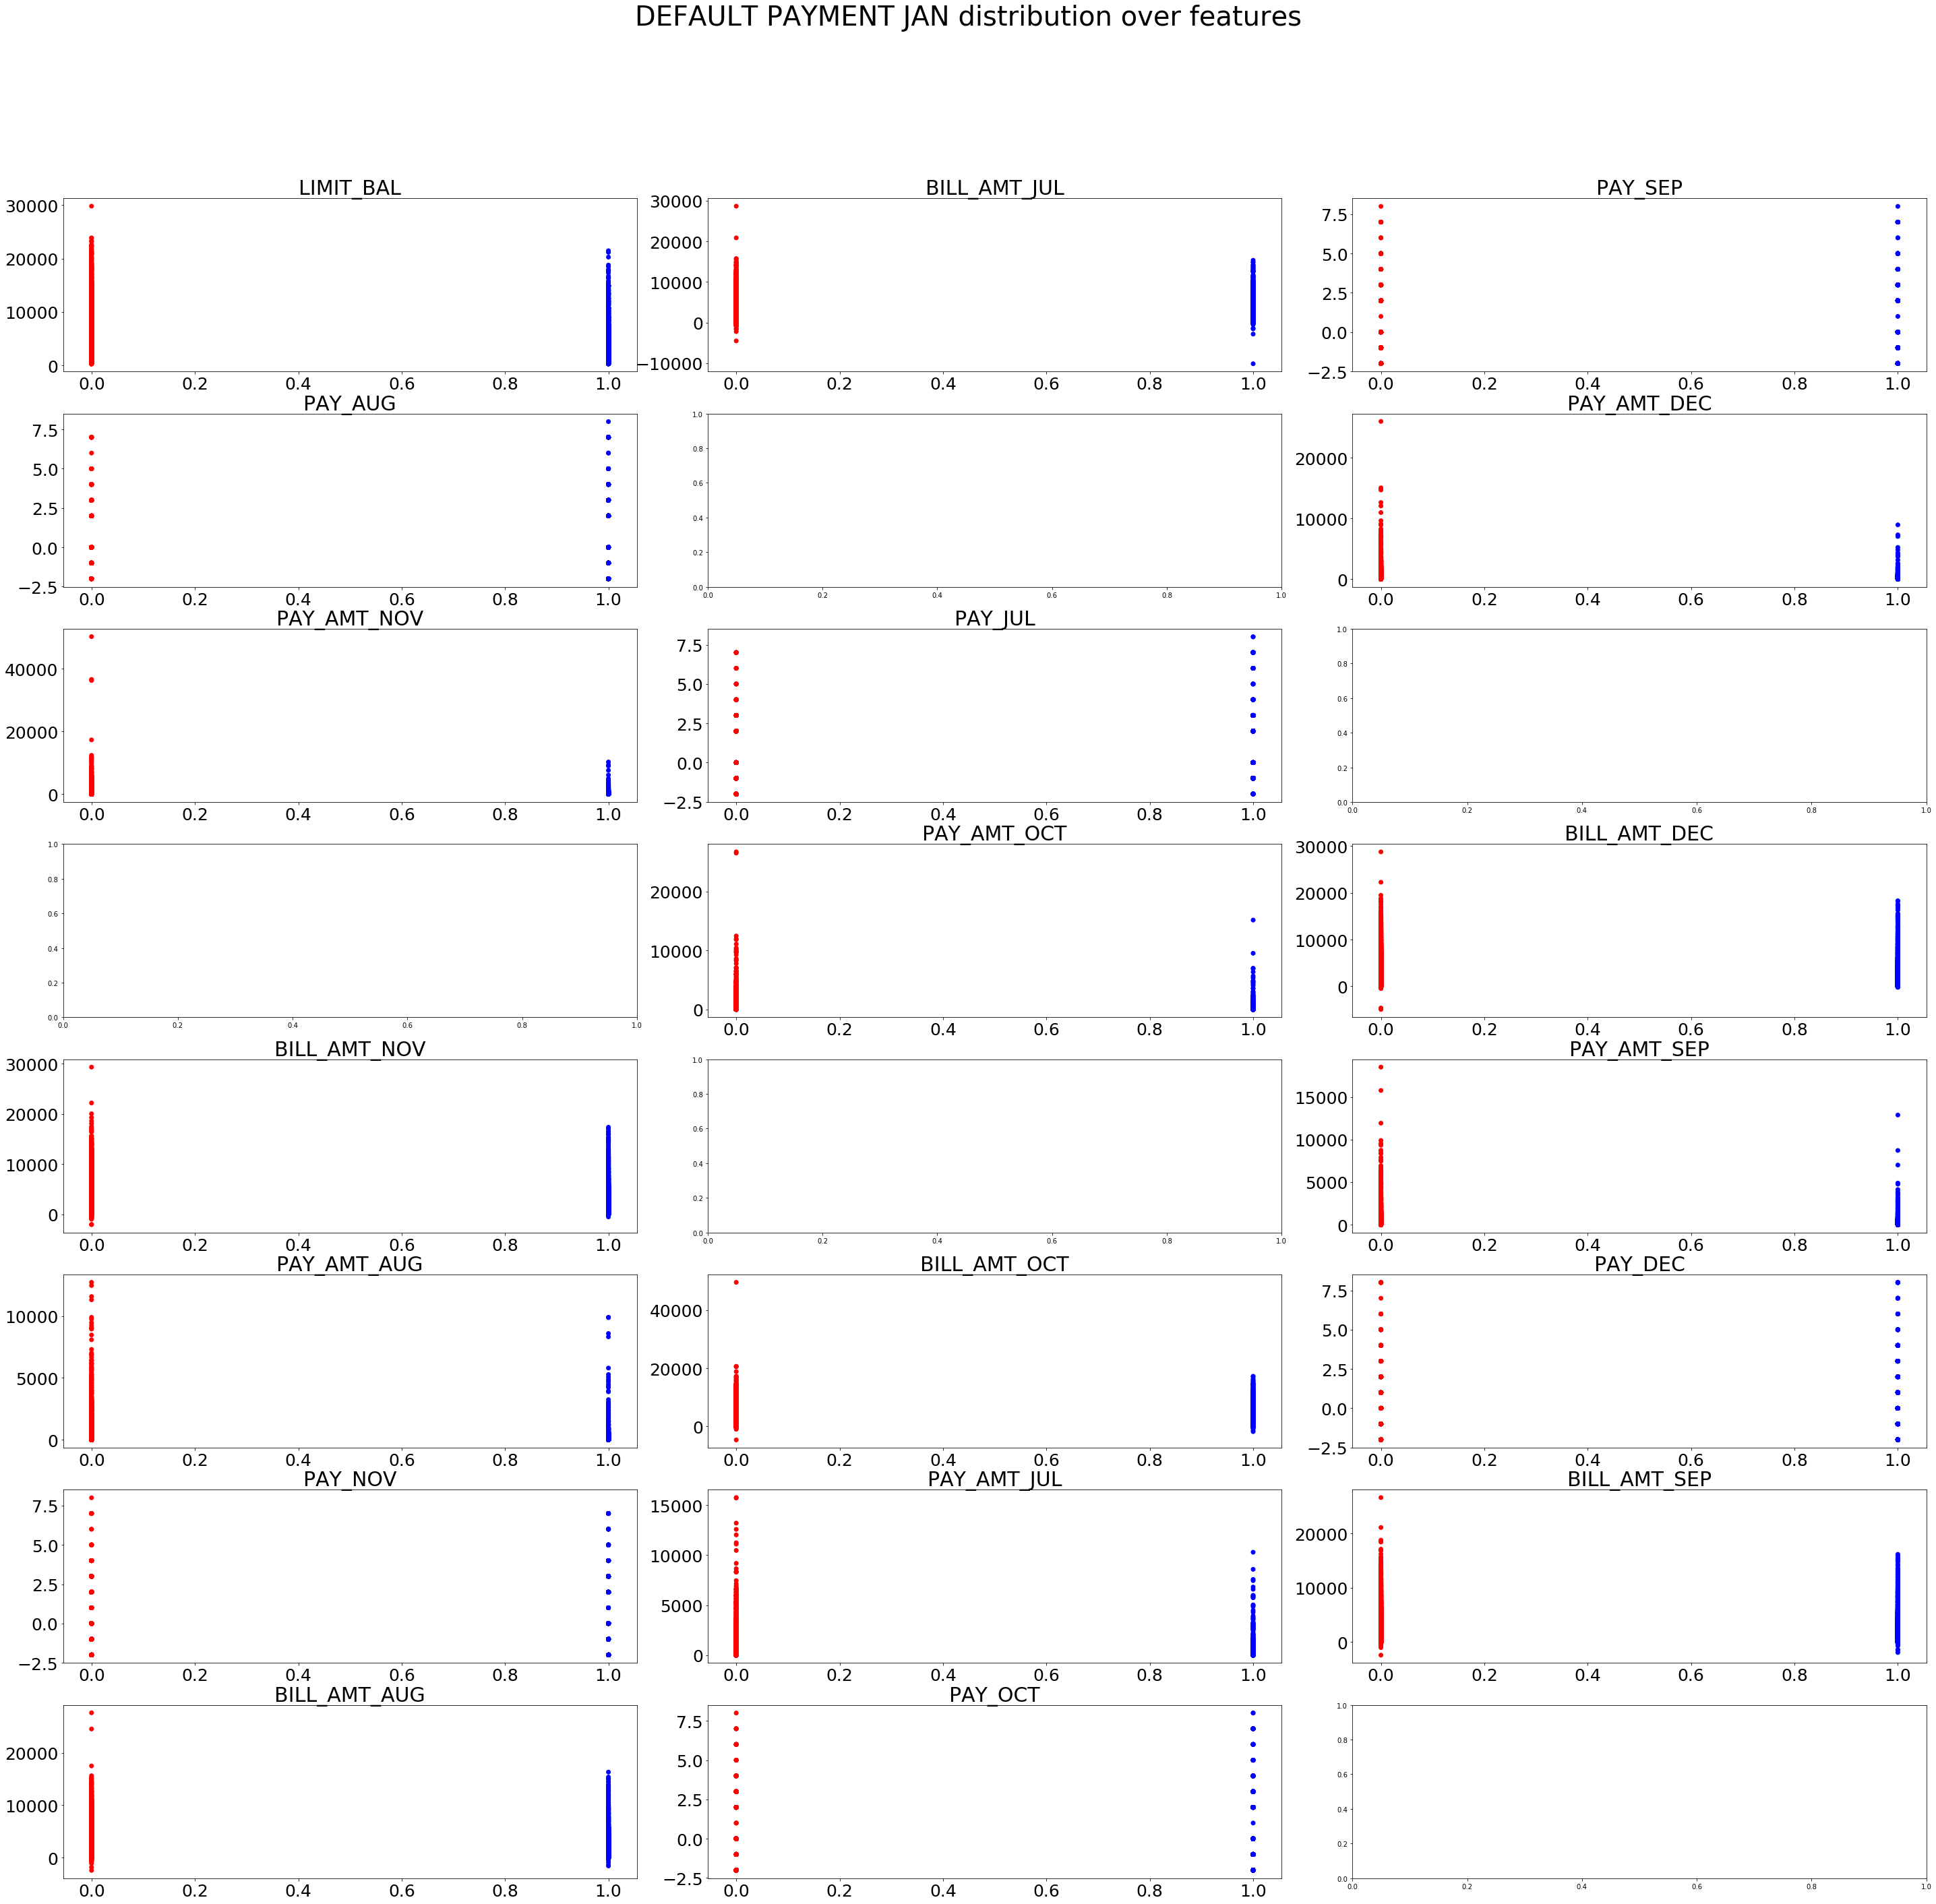

In [11]:
# Plot distribution of the target value (DEFAULT PAYMENT JAN) with respect to the features
fig, axarr = plt.subplots(8, 3,figsize=(40, 40))
fig.suptitle("DEFAULT PAYMENT JAN distribution over features", fontsize=40)
colors = {0:'r', 1:'b'}


for index,col in enumerate(df_data_1.columns):
    if col != "SEX" and col != "EDUCATION" and col != "MARRIAGE" and col != "BIRTH_DATE" and col != "DEFAULT PAYMENT JAN":
        i = index%8
        j = index%3
        axarr[i,j].scatter(df_target["DEFAULT PAYMENT JAN"], df_data_1[col], c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]))
        axarr[i,j].set_title(col, size=30)
        axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

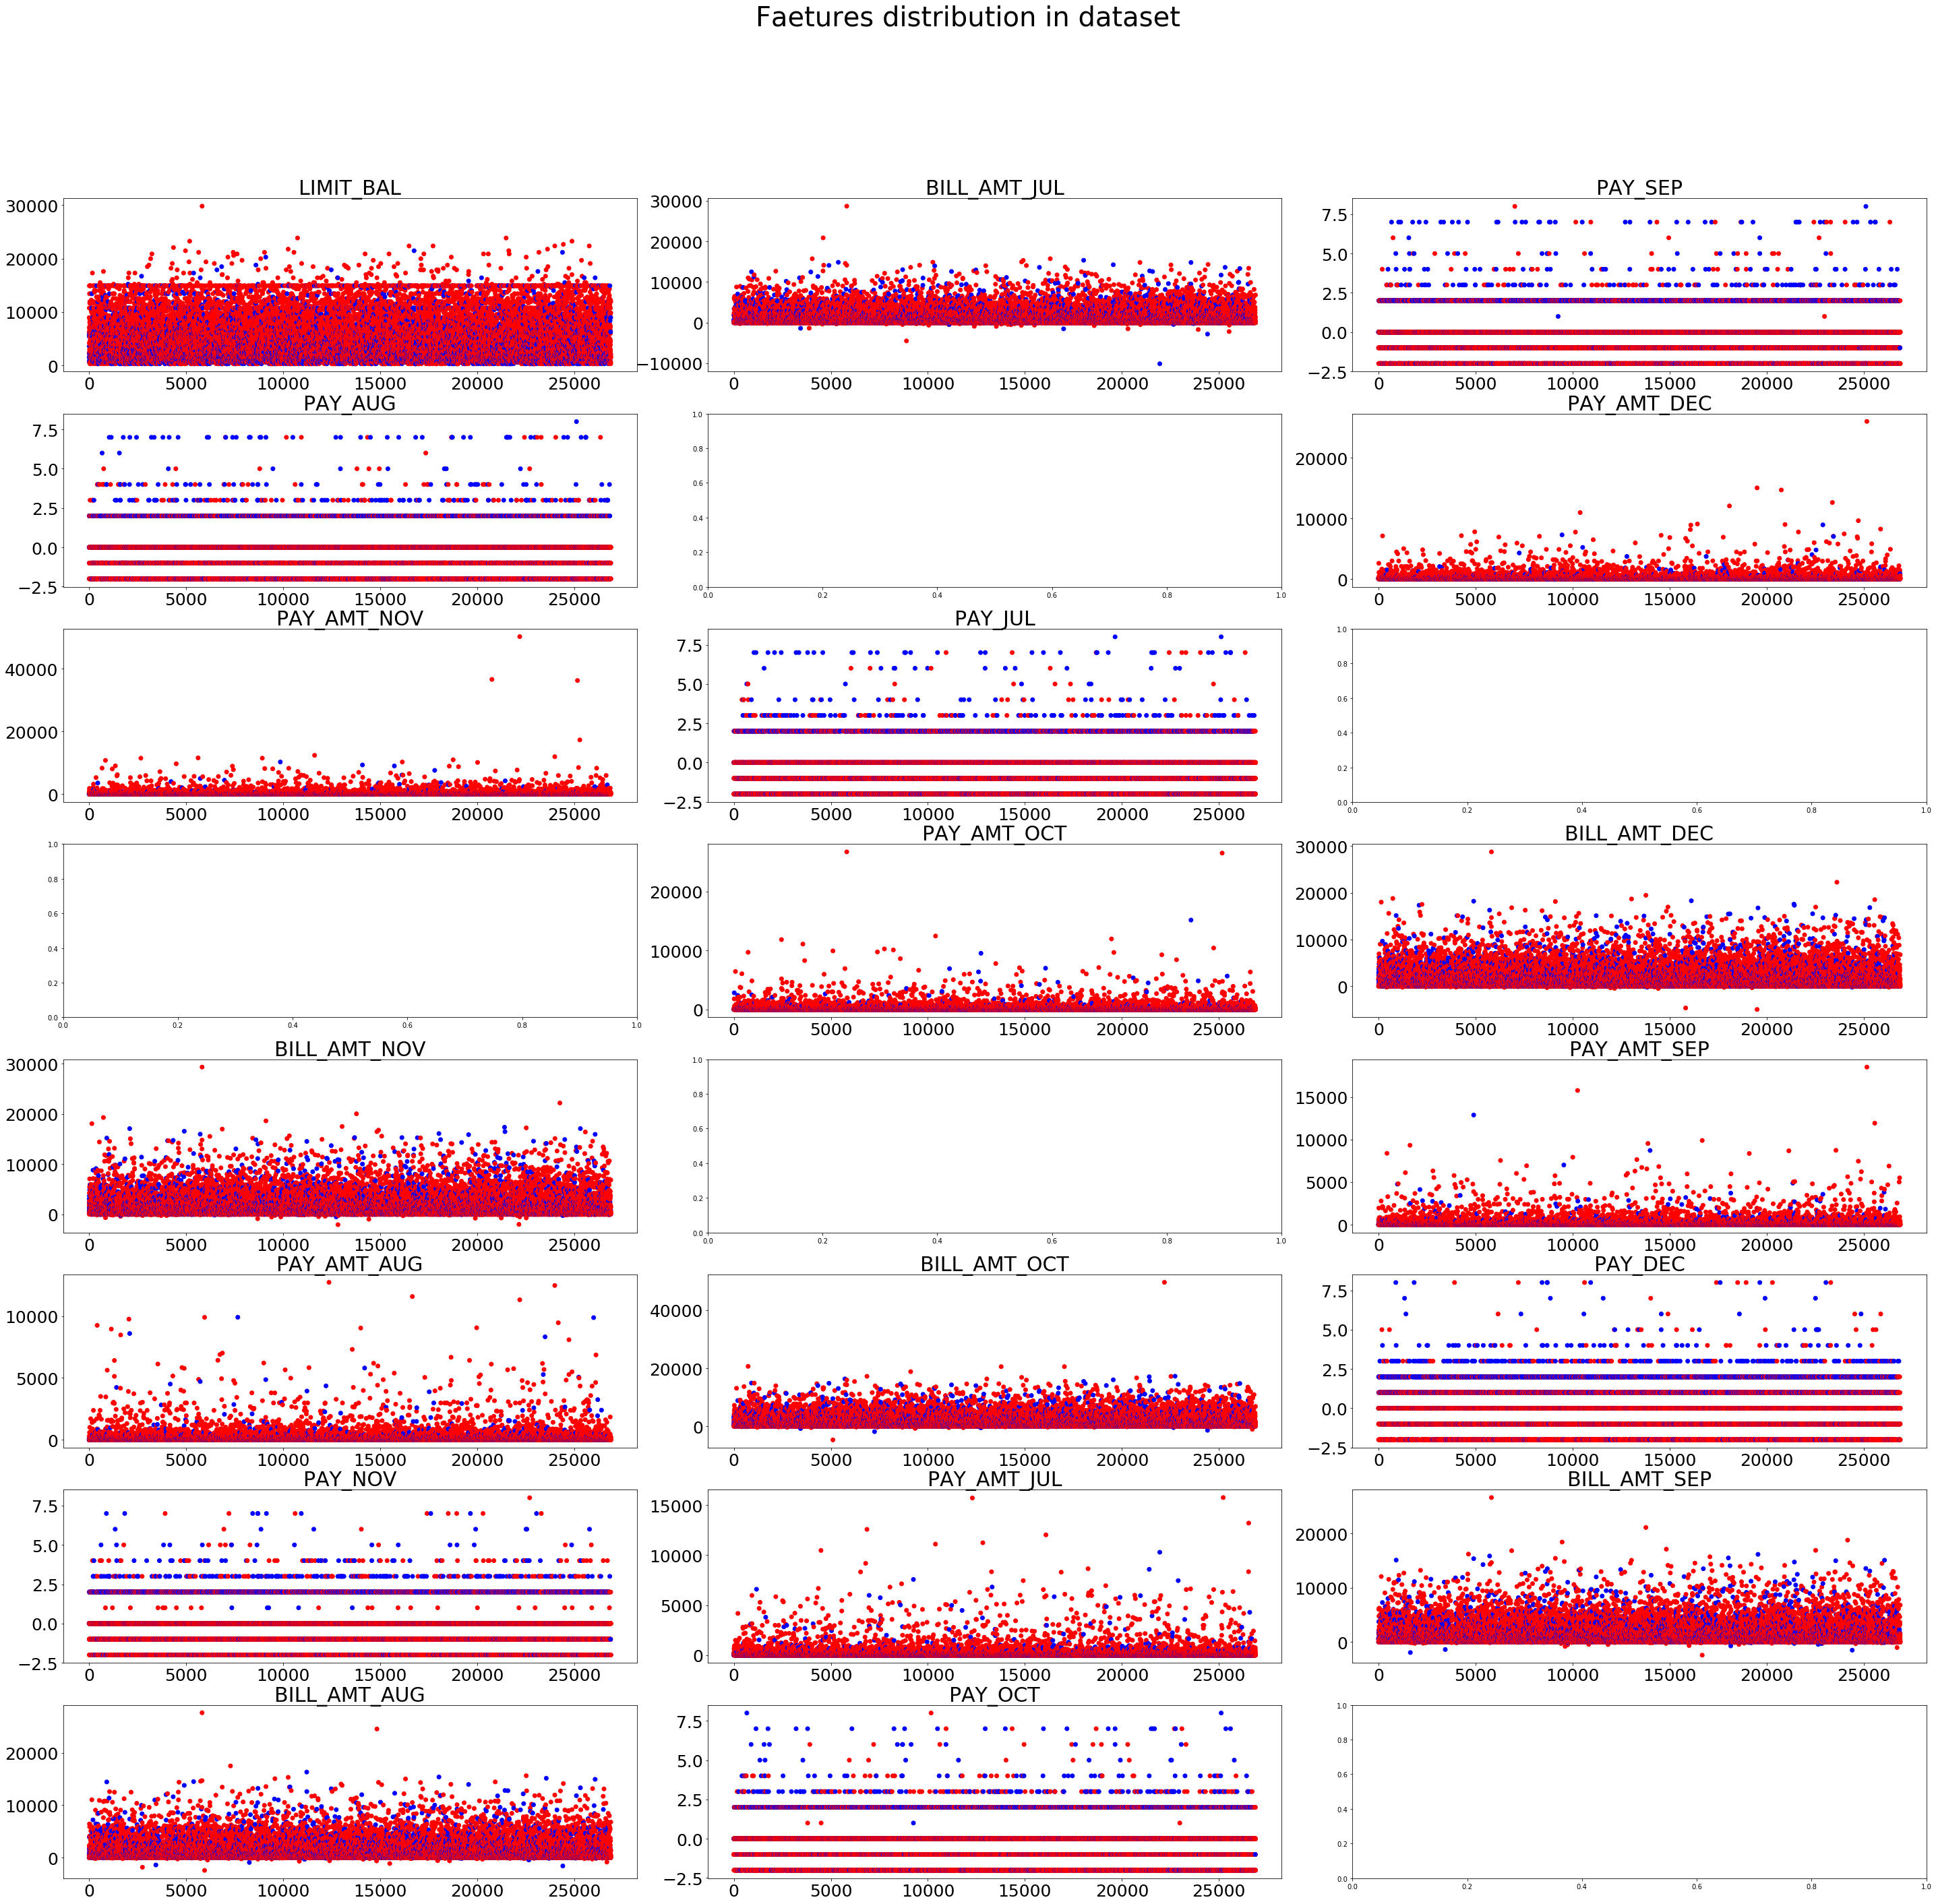

In [12]:
# Plot distribution of the target value (Usura_mat_g) with respect to the features
fig, axarr = plt.subplots(8, 3,figsize=(40, 40))
fig.suptitle("Faetures distribution in dataset", fontsize=40)

for index,col in enumerate(df_data_1.columns):
    if col != "SEX" and col != "EDUCATION" and col != "MARRIAGE" and col != "BIRTH_DATE" and col != "DEFAULT PAYMENT JAN":
        i = index%8
        j = index%3
        axarr[i,j].scatter(np.arange(1,df_data_1.shape[0]+1), df_data_1[col], c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]))
        axarr[i,j].set_title(col, size=30)
        axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

# Drop / FillNaN :

In [14]:
# Drop noisy/useless/target features
df_data_11 = df_data_1.drop("BIRTH_DATE",1)

In [15]:
# fill NaN
for col in df_data_11.columns:
    v = df_data_11[col].isnull().sum()
    if v != 0:
        print("Column " + str(col) + " has " + str(v) + " NaN values")

print(df_data_11["SEX"].unique())
print(df_data_11["EDUCATION"].unique())
print(df_data_11["MARRIAGE"].unique())

df_data_11 = df_data_11.fillna(value = "other")

print(df_data_11["SEX"].unique())
print(df_data_11["EDUCATION"].unique())
print(df_data_11["MARRIAGE"].unique())

df_data_11.head()

Column SEX has 258 NaN values
Column EDUCATION has 313 NaN values
Column MARRIAGE has 50 NaN values
['M' 'F' nan]
['university' 'high school' 'graduate school' 'other' nan]
['single' 'married' nan 'other']
['M' 'F' 'other']
['university' 'high school' 'graduate school' 'other']
['single' 'married' 'other']


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,PAY_JUL,...,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL
53613503,1490.680,M,university,single,0,0,0,0,2,0,...,581.961472,629.156401,599.283174,608.257067,89.440800,149.06800,68.571280,0.000000,29.81360,59.627200
35524089,5664.584,M,university,married,0,0,0,0,0,-2,...,3137.285128,533.872135,-2.772665,-14.399969,149.068000,159.83071,29.813600,0.000000,0.00000,0.000000
58777007,6260.856,F,high school,married,0,0,-1,-1,-2,-2,...,10.852150,-19.349026,-19.349026,-19.349026,59.627200,532.59015,16.963938,0.000000,0.00000,29.813600
26913418,8944.080,F,graduate school,married,-2,-2,-2,-2,-2,-2,...,216.744872,88.546392,70.330282,253.177091,80.556347,217.22189,88.784901,70.628418,298.46395,216.416922
41993633,3577.632,F,graduate school,married,-1,-1,-1,-1,-1,-1,...,29.813600,0.000000,569.439760,0.000000,119.254400,29.81360,0.000000,569.439760,0.00000,0.000000


# One Hot Encoding:

In [16]:
# Binarize discrete features
df_data_2 = pd.get_dummies(df_data_11, columns=["SEX","EDUCATION","MARRIAGE", "PAY_DEC",
                                                "PAY_NOV", "PAY_OCT", "PAY_SEP", "PAY_AUG", "PAY_JUL"])

In [17]:
print("Data-dimension as loaded: " + str(df_data_1.shape))
print("Data-dimension after drop: " + str(df_data_11.shape))
print("Data-dimension OHE: " + str(df_data_2.shape))

Data-dimension as loaded: (26884, 23)
Data-dimension after drop: (26884, 22)
Data-dimension OHE: (26884, 87)


In [18]:
df_data_2.head()

,LIMIT_BAL,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,...,PAY_JUL_-2,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8
53613503,1490.680,1494.853904,462.677258,581.961472,629.156401,599.283174,608.257067,89.440800,149.06800,68.571280,...,0,0,1,0,0,0,0,0,0,0
35524089,5664.584,2946.001070,3046.174766,3137.285128,533.872135,-2.772665,-14.399969,149.068000,159.83071,29.813600,...,1,0,0,0,0,0,0,0,0,0
58777007,6260.856,1761.119166,1753.934088,10.852150,-19.349026,-19.349026,-19.349026,59.627200,532.59015,16.963938,...,1,0,0,0,0,0,0,0,0,0
26913418,8944.080,88.635833,80.317838,216.744872,88.546392,70.330282,253.177091,80.556347,217.22189,88.784901,...,1,0,0,0,0,0,0,0,0,0
41993633,3577.632,29.217328,119.254400,29.813600,0.000000,569.439760,0.000000,119.254400,29.81360,0.000000,...,0,1,0,0,0,0,0,0,0,0


In [19]:
df_data_2.describe()

,LIMIT_BAL,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,...,PAY_JUL_-2,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8
count,26884.00000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,...,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,4997.91411,1530.136656,1467.012379,1404.166272,1292.346498,1203.977907,1159.529034,168.639427,178.825861,156.416357,...,0.162811,0.192531,0.542367,0.091727,0.006212,0.001637,0.000409,0.000632,0.001599,0.000074
std,3879.73624,2206.111841,2129.923058,2072.220534,1923.241494,1816.137779,1775.876050,495.392694,688.001298,531.588567,...,0.369200,0.394295,0.498211,0.288646,0.078572,0.040423,0.020224,0.025139,0.039962,0.008625
min,298.13600,-4936.535888,-2080.303567,-4688.605990,-2424.859342,-2424.859342,-10124.788000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1490.68000,105.115300,87.622170,79.535231,68.951403,52.553923,37.594950,29.634718,24.879449,11.627304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4173.90400,667.198554,631.705464,599.491869,568.008707,539.998830,506.920641,62.608560,60.044590,54.260752,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7155.26400,1997.891324,1905.320095,1798.386166,1629.998953,1504.528417,1473.179417,149.276695,149.068000,134.369895,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29813.60000,28755.545150,29334.525260,49612.483810,26581.388370,27642.305330,28670.665830,26043.729910,50213.824120,26714.178140,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_data_2.to_csv("../common/albertom/cleaned_step1.csv", index = True)

 - df_data_1: dataset with NaN
 - df_data_11: dataset without NaN
 - df_data_2: dataset OHE

# Normalize data:

In [21]:
df_data_3 = df_data_2.copy()
df_data_3.ix[:,0:13] = np.cbrt(df_data_3.ix[:,0:13])
df_data_3.head()

,LIMIT_BAL,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,...,PAY_JUL_-2,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8
53613503,11.423385,11.434037,7.734390,8.348941,8.568791,8.430966,8.472841,4.472104,5.302266,4.093053,...,0,0,1,0,0,0,0,0,0,0
35524089,17.826086,14.335438,14.496114,14.639222,8.112333,-1.404858,-2.432879,5.302266,5.426920,3.100784,...,1,0,0,0,0,0,0,0,0,0
58777007,18.430816,12.076180,12.059735,2.213971,-2.684642,-2.684642,-2.684642,3.906743,8.105834,2.569462,...,1,0,0,0,0,0,0,0,0,0
26913418,20.757668,4.458647,4.314568,6.006889,4.457147,4.127757,6.326179,4.318835,6.011293,4.461145,...,1,0,0,0,0,0,0,0,0,0
41993633,15.294380,3.079972,4.922187,3.100784,0.000000,8.288627,0.000000,4.922187,3.100784,0.000000,...,0,1,0,0,0,0,0,0,0,0


 - df_data_1: dataset with NaN
 - df_data_11: dataset without NaN
 - df_data_2: dataset OHE
 - df_data_3: dataset normalized with cubic root

In [22]:
df_data_3.describe()

,LIMIT_BAL,BILL_AMT_DEC,BILL_AMT_NOV,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,...,PAY_JUL_-2,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8
count,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,...,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,15.849545,8.876704,8.652644,8.477781,8.188224,7.913961,7.681381,4.036627,4.000679,3.737910,...,0.162811,0.192531,0.542367,0.091727,0.006212,0.001637,0.000409,0.000632,0.001599,0.000074
std,4.617002,5.481278,5.532600,5.505775,5.414945,5.365281,5.435764,2.678713,2.758611,2.719824,...,0.369200,0.394295,0.498211,0.288646,0.078572,0.040423,0.020224,0.025139,0.039962,0.008625
min,6.680436,-17.027103,-12.765630,-16.737140,-13.434727,-13.434727,-21.633593,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.423385,4.719420,4.441585,4.300509,4.100603,3.745718,3.349987,3.094569,2.919310,2.265477,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.100801,8.738127,8.580348,8.431945,8.281678,8.143247,7.973457,3.970799,3.915837,3.785837,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.269712,12.594781,12.397173,12.160767,11.768716,11.458650,11.378505,5.304739,5.302266,5.121934,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.007837,30.636598,30.840851,36.744893,29.844150,30.236029,30.606424,29.641560,36.892756,29.893764,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plot distribution of features:

We plot the distribution of the first 13 features against samples before and after the normalization using the cubic squadred root.

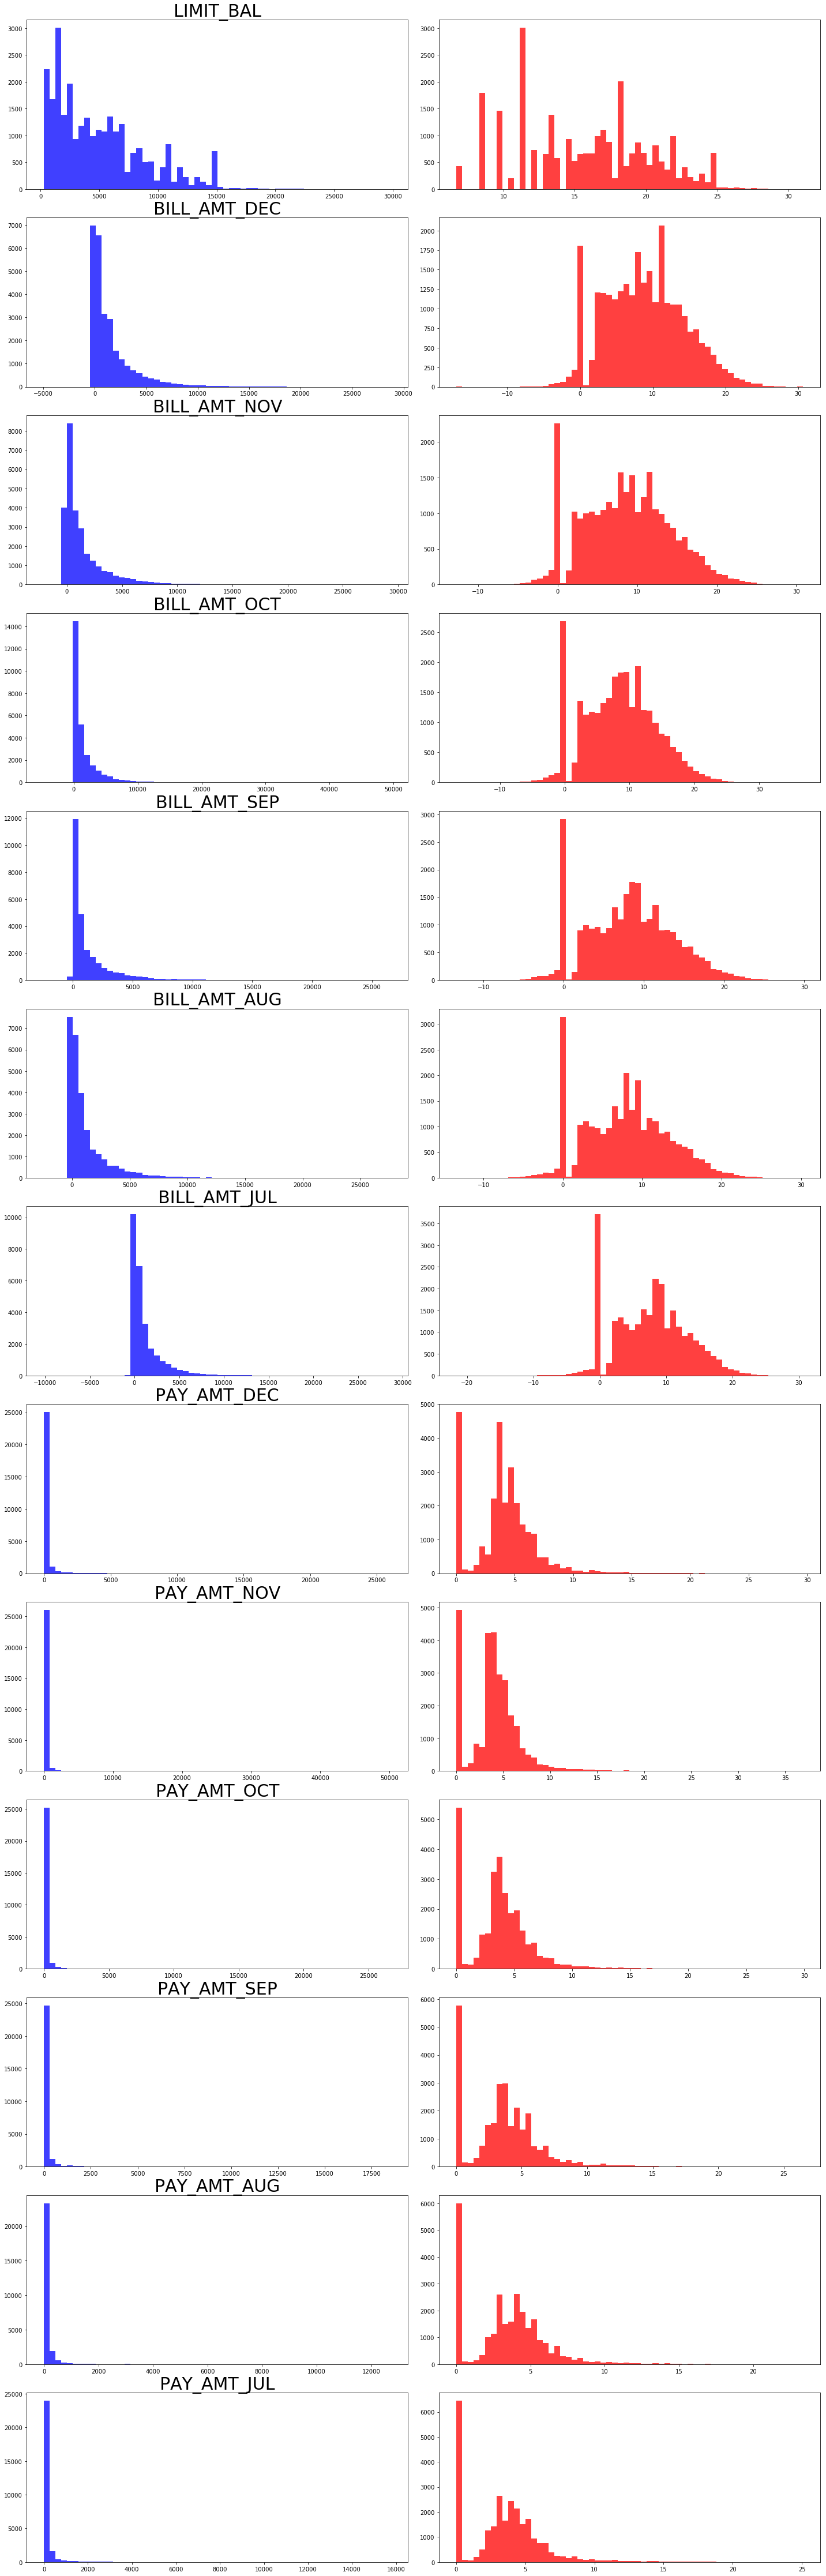

In [23]:
fig, axarr = plt.subplots(13, 2,figsize=(20, 70))

for index, col in enumerate(df_data_2.columns.values):

    if index < 13:
        axarr[index, 0].set_title(col, size=30)
        axarr[index, 0].hist(df_data_2[col].values, 60, facecolor='blue', alpha=0.75)
        axarr[index, 1].hist(df_data_3[col].values, 60, facecolor='red', alpha=0.75)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
    
plt.show()

In [24]:
df_data_3.to_csv("../common/albertom/cleaned_step2.csv", index = True)

# Train, Test and Val split:

In [25]:
X = df_data_3.values
y = df_target.values

In [26]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(df_target["DEFAULT PAYMENT JAN"], 1, test_size=.15, random_state=0)

for split_index, test_index in sss_1:

    X_split, X_test = X[split_index], X[test_index]
    y_split, y_test = y[split_index], y[test_index]
    
    sss_2 = StratifiedShuffleSplit(pd.DataFrame(y_split)[0].values, 1, test_size=.15, random_state=0)
    
    for train_index, val_index in sss_2:

        X_train, X_val = X_split[train_index], X_split[val_index]
        y_train, y_val = y_split[train_index], y_split[val_index]

        print("Train shape: " + str(X_train.shape))
        print("Train target shape: " + str(y_train.shape))
        
        print("Test shape: " + str(X_test.shape))
        print("Test target shape: " + str(y_test.shape))
        
        print("Val shape: " + str(X_val.shape))
        print("Val target shape: " + str(y_val.shape))

        pd.DataFrame(X_train).to_csv("../common/albertom/train_test_val_split/X_train.csv", index = True)
        pd.DataFrame(y_train).to_csv("../common/albertom/train_test_val_split/y_train.csv", index = True)
        
        pd.DataFrame(X_test).to_csv("../common/albertom/train_test_val_split/X_test.csv", index = True)
        pd.DataFrame(y_test).to_csv("../common/albertom/train_test_val_split/y_test.csv", index = True)
        
        pd.DataFrame(X_val).to_csv("../common/albertom/train_test_val_split/X_val.csv", index = True)
        pd.DataFrame(y_val).to_csv("../common/albertom/train_test_val_split/y_val.csv", index = True)

        X_train = pd.DataFrame(X_train)
        y_train = pd.DataFrame(y_train)
        
        X_test = pd.DataFrame(X_test)
        y_test = pd.DataFrame(y_test)
        
        X_val = pd.DataFrame(X_val)
        y_val = pd.DataFrame(y_val)
    

/Users/albertomariopirovano/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train shape: (19423, 87)
Train target shape: (19423, 2)
Test shape: (4033, 87)
Test target shape: (4033, 2)
Val shape: (3428, 87)
Val target shape: (3428, 2)


In [27]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,9.634856,8.382878,8.413033,8.696147,9.017886,9.252007,9.361804,4.472104,4.707903,4.472104,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.507695,1.476656,1.574811,2.540538,1.434443,0.000000,0.000000,1.574811,2.540538,1.434443,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.139158,11.879250,11.923661,12.013227,12.045026,11.744630,11.857166,4.000204,5.208719,3.857953,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.360872,4.122501,4.122501,5.194026,4.122501,4.122501,4.122501,4.122501,5.194026,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.360872,4.332114,3.685432,2.564938,12.250356,12.022104,12.022104,3.685432,2.564938,12.250356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



# PCA:

In [28]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
# Calculate cummulate explained variance for selecting number of features
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

[ 0.6633066   0.76185802  0.8160975   0.85112618  0.87922315  0.90231751
  0.9242519   0.9443828   0.96085673  0.96873503  0.97455332  0.97900658
  0.9830746   0.98598345  0.98821276  0.9902991   0.99215501  0.99355728
  0.99444593  0.99521474  0.99596355  0.99649934  0.99696386  0.99734656
  0.99770442  0.9979794   0.99824372  0.99846069  0.99866338  0.99884442
  0.99900391  0.99912449  0.99924314  0.99932709  0.99940774  0.9994846
  0.99955729  0.99961637  0.99967418  0.99972608  0.99976952  0.99981014
  0.99984168  0.99986693  0.99988995  0.99990923  0.99992578  0.99993759
  0.99994778  0.99995641  0.99996338  0.99996903  0.99997438  0.99997846
  0.99998172  0.99998431  0.99998663  0.99998888  0.99999086  0.99999244
  0.99999379  0.99999501  0.99999598  0.99999678  0.99999742  0.99999796
  0.99999837  0.99999872  0.99999894  0.99999915  0.99999933  0.9999995
  0.99999966  0.99999981  0.99999992  0.99999997  1.          1.          1.
  1.          1.          1.          1.         

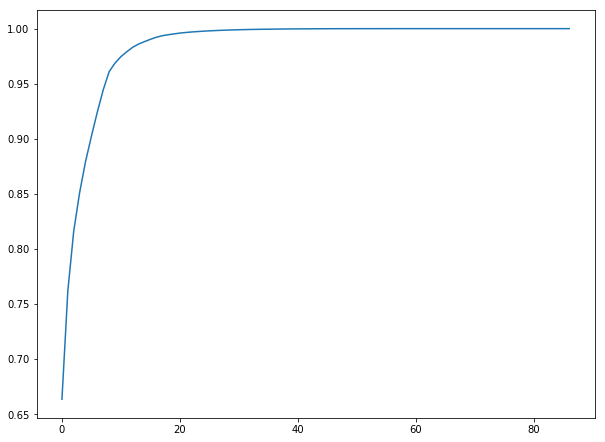

In [29]:
# Plot cummulate explained variance
x = np.arange(cum_expl_var.shape[0])
y = cum_expl_var
plt.plot(x,y)

In [31]:
def num_components(cum_var, thrs):
    return (cum_var < thrs).sum()

In [32]:
print(num_components(cum_expl_var, 0.94))
print(num_components(cum_expl_var, 0.95))
print(num_components(cum_expl_var, 0.96))
print(num_components(cum_expl_var, 0.97))
print(num_components(cum_expl_var, 0.98))
print(num_components(cum_expl_var, 0.99))

7
8
8
10
12
15


# Generate PCA transformed X_train and X_test:

In [33]:
# Apply PCA on the selected number of components
pca = PCA(n_components = num_components(cum_expl_var, 0.99))
pca.fit(X_train)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

[ 0.6633066   0.76185802  0.8160975   0.85112618  0.87922315  0.90231751
  0.9242519   0.9443828   0.96085673  0.96873503  0.97455332  0.97900658
  0.9830746   0.98598345  0.98821276]


In [34]:
# Create datafrae with the transformed data
x_train_trasf = pca.fit_transform(X_train)
x_test_trasf = pca.fit_transform(X_test)
x_val_trasf = pca.fit_transform(X_val)

df_data_train_1 = pd.DataFrame(x_train_trasf)
df_data_test_1 = pd.DataFrame(x_test_trasf)
df_data_val_1 = pd.DataFrame(x_val_trasf)

In [35]:
print(df_data_train_1.shape)
df_data_train_1.head()

(19423, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-18.341700,-1.499321,-1.355711,4.085164,0.507722,1.323943,-1.158738,3.239028,-0.351744,4.684860,-1.288305,-0.614564,-1.519187,1.272009,0.056802
1,19.524442,-2.030392,-0.674545,-3.829560,0.021374,-3.275420,1.350335,1.898675,0.694699,-2.756291,-0.794842,1.239967,1.987568,1.351527,0.320140
2,0.877070,-5.641901,3.048596,1.115479,0.016561,0.644258,-0.395762,0.024898,0.223658,0.744945,0.004950,-0.120814,-0.338179,0.930984,0.727694
3,-5.824436,-7.146028,2.308765,1.485002,1.753751,0.034794,0.535366,-0.180122,1.468998,2.604550,0.730249,-0.127980,0.202259,0.150690,0.239654
4,-5.021571,4.583527,-3.234845,2.983661,-2.991689,-1.813864,1.493669,-2.691452,-2.037845,2.800192,-1.108048,0.335992,-0.956529,0.222923,0.469923


In [36]:
print(df_data_test_1.shape)
df_data_test_1.head()

(4033, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.718190,-6.316477,-2.083559,0.975329,-0.296123,1.974713,0.379124,-0.007346,1.958610,-1.165545,0.759267,-0.382960,-0.584108,1.553068,0.568155
1,0.020365,-0.602705,9.139554,0.840974,0.546386,-5.230693,-0.084946,-10.231455,-0.852961,0.451182,0.669967,-0.829130,1.024189,0.229777,0.039074
2,9.975737,-3.348945,-0.572407,0.087099,0.788437,0.297061,0.889188,0.581228,-0.122152,-0.471265,0.488114,-0.081484,-0.171997,-0.577768,-0.305709
3,-22.105474,0.258111,0.720882,-3.436382,-1.524025,0.087214,-0.444141,0.608868,1.049485,0.409754,-0.329481,-0.048179,-0.009104,-0.527232,1.436285
4,-14.011642,2.771666,-3.670775,-0.453639,-0.303950,-1.095188,-2.580395,-1.656323,-1.115220,0.806741,-0.176124,0.275889,-0.784059,1.083727,-1.022582


In [37]:
print(df_data_val_1.shape)
df_data_val_1.head()

(3428, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.121868,-4.745601,-3.924026,2.321226,1.560214,0.136213,0.058430,-0.207562,0.129703,0.631256,-0.073079,-0.072597,-0.046537,-1.095476,0.020630
1,-18.892884,1.320438,2.465213,-0.328190,-2.543895,0.728472,-1.207503,1.209443,0.543729,0.205444,0.680009,-0.282380,-0.080302,0.704979,0.989506
2,8.413480,-3.967846,-1.918874,0.249799,0.485784,0.726944,-0.507952,-0.138389,0.109414,0.208978,-0.092068,0.341340,-0.376661,-0.591347,0.472876
3,-10.221737,-0.903182,-1.343646,1.040087,2.489991,2.670366,-0.744474,2.248467,-0.269104,-0.410595,-1.574587,0.339107,-0.976277,0.889252,1.044321
4,-1.601570,0.028557,-10.087533,2.789941,-7.033029,-5.960131,0.690240,-2.786239,2.339409,5.522192,1.373145,0.145312,0.697188,0.479149,1.207729


In [38]:
df_data_train_1.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,12.887,4.967,3.685,2.961,2.652,2.405,2.343,2.245,2.031,1.404,1.207,1.056,1.009,0.853,0.747
min,-44.572,-11.167,-24.821,-14.821,-21.451,-21.175,-18.418,-18.633,-14.655,-11.720,-12.587,-6.915,-9.935,-2.033,-1.842
25%,-9.740,-4.107,-1.705,-1.856,-1.048,-0.894,-0.793,-0.789,-1.003,-0.596,-0.469,-0.412,-0.408,-0.640,-0.396
50%,-0.655,-0.286,0.264,-0.265,0.124,0.070,-0.046,0.062,0.118,0.044,0.045,0.018,-0.024,-0.191,-0.112
75%,8.402,3.616,2.042,1.537,1.275,0.809,0.847,0.856,0.944,0.603,0.466,0.425,0.420,0.594,0.248
max,58.119,23.352,27.018,31.006,24.069,25.712,24.463,24.679,18.952,13.753,15.267,12.401,12.574,3.237,3.914


In [39]:
df_data_train_1.to_csv("../common/albertom/train_test_val_split/X_train_pca.csv")
df_data_test_1.to_csv("../common/albertom/train_test_val_split/X_test_pca.csv")
df_data_val_1.to_csv("../common/albertom/train_test_val_split/X_val_pca.csv")

# Plot PCA features distribution over samples:

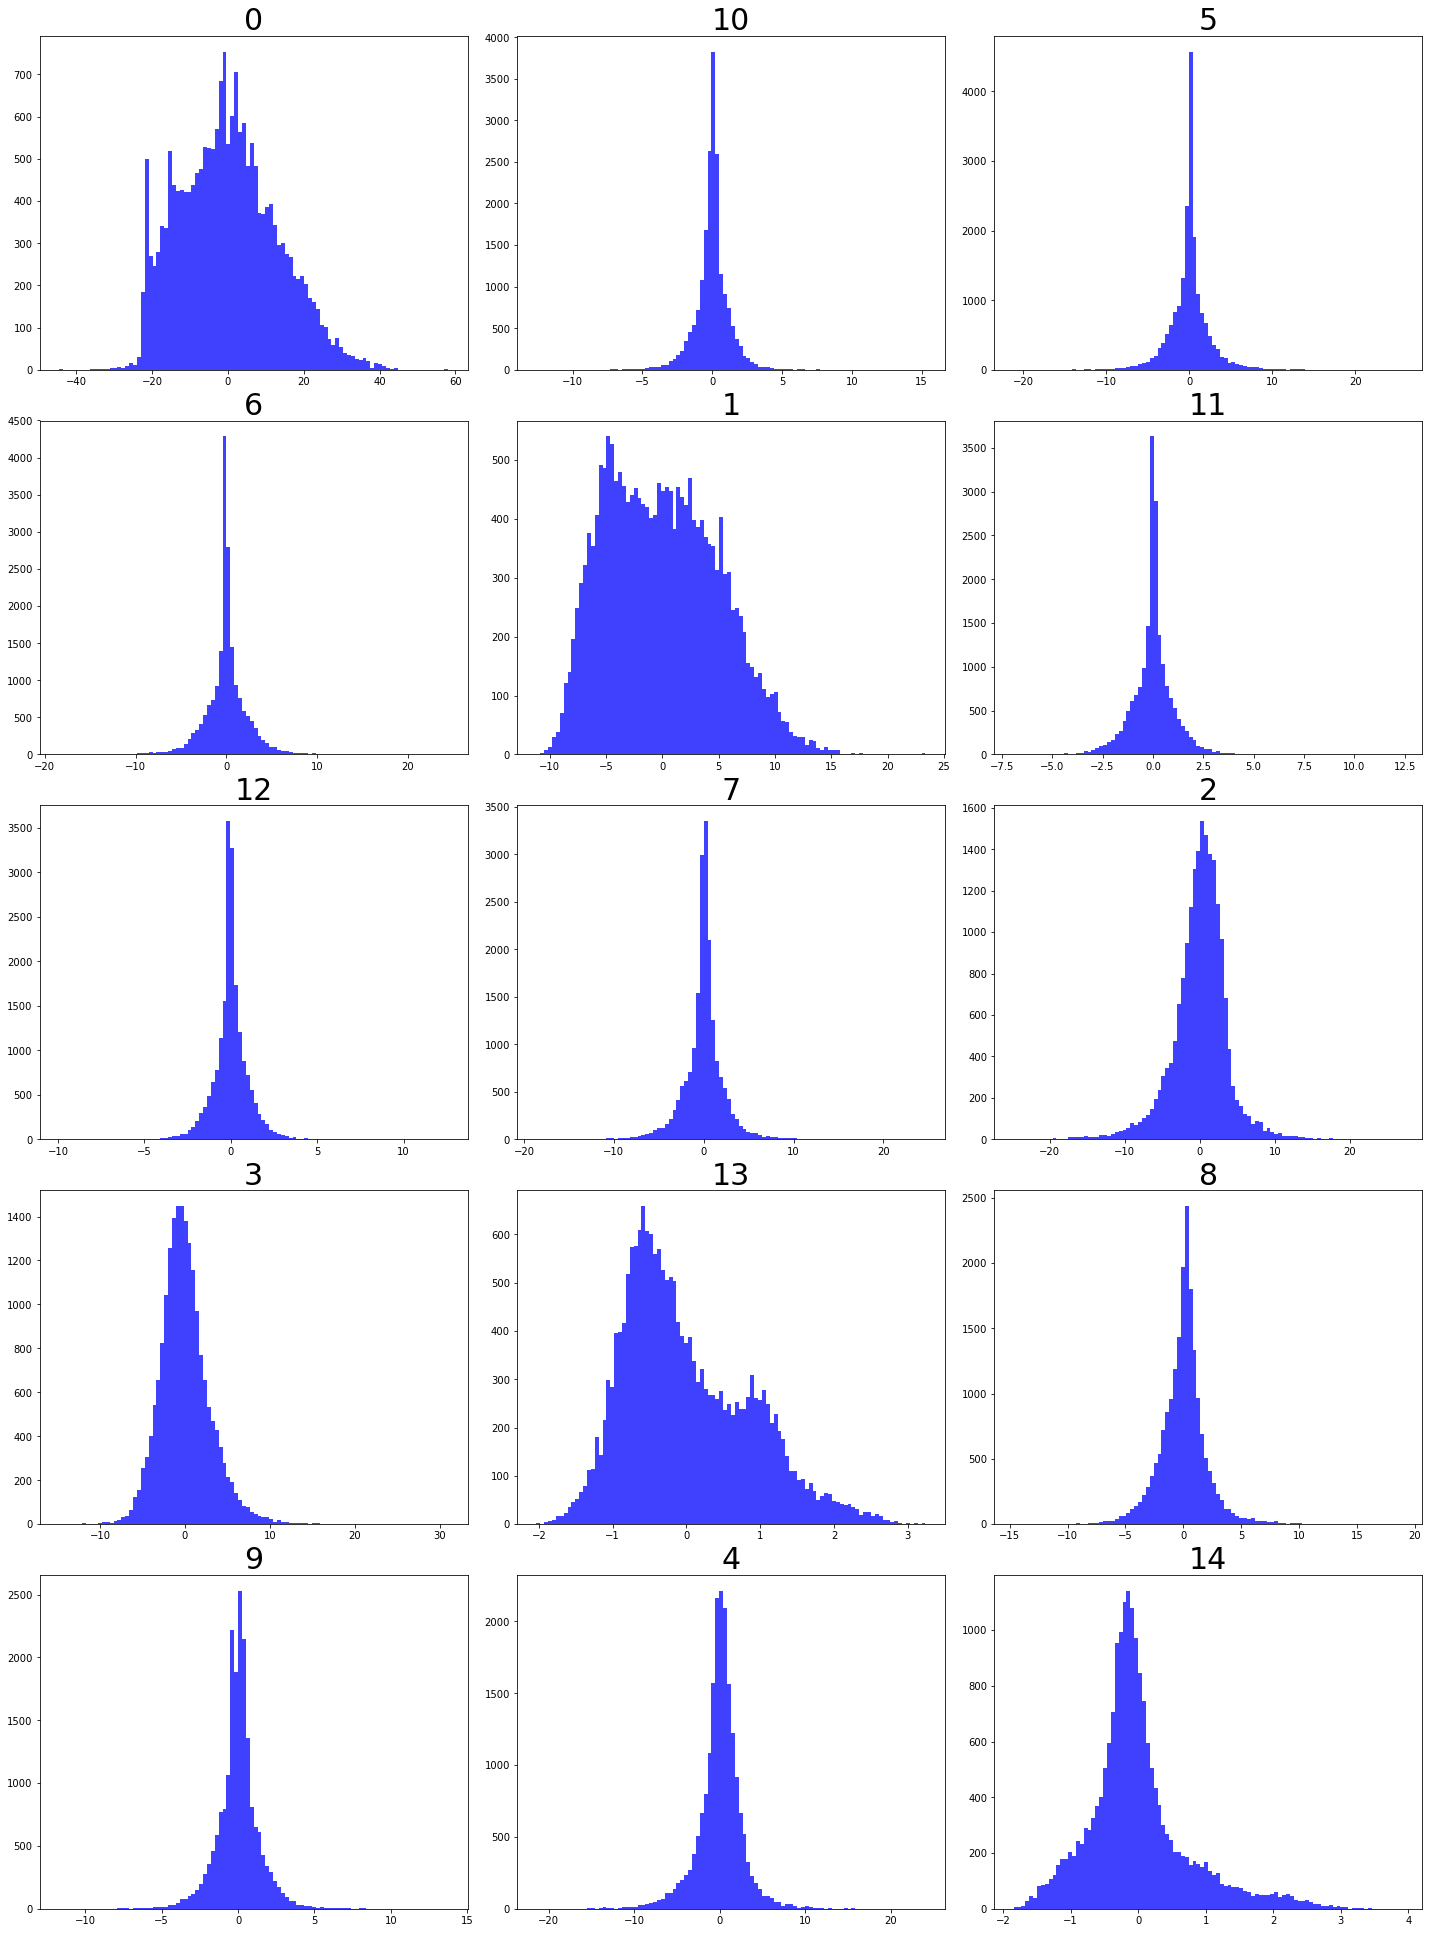

In [41]:
fig, axarr = plt.subplots(5, 3,figsize=(20, 30))

for index, col in enumerate(df_data_train_1.columns.values):

    i = index%5
    j = index%3
    axarr[i, j].set_title(col, size=30)
    axarr[i, j].hist(df_data_train_1[col].values, 100, facecolor='blue', alpha=0.75)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
    
plt.show()

# Visualize data in the first 3 principal components (81% variance):

In [42]:
# Apply PCA on the selected number of components
pca = PCA(n_components = num_components(cum_expl_var, 0.81652937))
pca.fit(X_train)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

# Create datafrae with the transformed data
x_train_trasf_visual = pca.fit_transform(X_train)

df_data_train_visual = pd.DataFrame(x_train_trasf_visual)
df_data_train_visual.head()

[ 0.6633066   0.76185802  0.8160975 ]


,0,1,2
0,-18.341700,-1.499321,-1.355711
1,19.524442,-2.030392,-0.674545
2,0.877070,-5.641901,3.048596
3,-5.824436,-7.146028,2.308765
4,-5.021571,4.583527,-3.234845


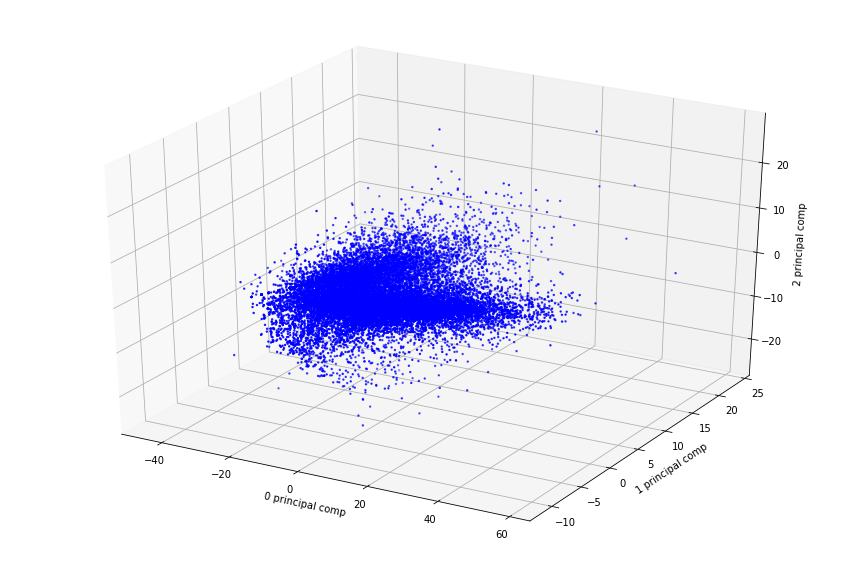

In [58]:
plt.rcParams['figure.figsize'] = (15.0, 10)
df_test = df_data_train_visual
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = df_test[0].values
Y = df_test[1].values
Z = df_test[2].values
colors = {0:'blue', 1:'red'}

ax.scatter(X, Y, Z, c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]), s=2)
ax.set_xlabel('0 principal comp')
ax.set_ylabel('1 principal comp')
ax.set_zlabel('2 principal comp')

plt.show()